<h2> Regression Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv("/Users/dr.shivambhatnagar/Desktop/github_python/Diabetes_Dataset_Cleaned.csv")
df.head()

,ParticipantID,TreatmentGroup,RandomizationDate,StudySite,Age,Gender,BMI,DiabetesDuration,SmokingStatus,EducationLevel,Complications,BaselineHbA1c,BaselineFBS,BaselineWeight,BaselineQoL,FollowupCompleted,HbA1cChange,FollowupHbA1c,FBSChange,FollowupFBS,WeightChange,FollowupWeight,QoLChange,FollowupQoL,TargetAchieved,PatientSatisfaction,AdverseEvents,DaysToComplication,ComplicationOccurred,MedicationAdherence
0,DM1001,0,2024-04-26,0,40,1,23.5,18,2,0,0,7.6,184.0,112.8,44,1,-0.6,7.0,10.0,194.0,0.2,113.0,6.3,50.0,0,1,0,149,1,96.7
1,DM1002,0,2024-07-12,3,32,1,36.6,1,0,1,3,10.9,198.0,108.5,57,1,0.7,11.6,23.0,221.0,-7.5,101.0,1.5,58.0,1,3,1,94,1,79.8
2,DM1003,0,2024-04-16,3,62,1,31.9,2,0,2,0,9.6,271.0,100.6,81,1,-0.9,8.7,9.0,280.0,-1.3,99.3,7.6,89.0,0,0,0,215,1,87.7
3,DM1004,0,2024-01-29,1,36,1,35.8,1,1,1,3,8.8,243.0,97.5,86,1,-2.5,6.3,-51.0,192.0,-1.1,96.4,-2.6,83.0,0,2,1,167,1,78.9
4,DM1005,0,2024-04-30,3,48,0,30.7,1,0,1,1,11.6,237.0,79.0,78,1,-0.1,11.5,-69.0,168.0,1.1,80.1,10.0,88.0,0,2,0,365,0,95.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ParticipantID         300 non-null    object 
 1   TreatmentGroup        300 non-null    int64  
 2   RandomizationDate     300 non-null    object 
 3   StudySite             300 non-null    int64  
 4   Age                   300 non-null    int64  
 5   Gender                300 non-null    int64  
 6   BMI                   300 non-null    float64
 7   DiabetesDuration      300 non-null    int64  
 8   SmokingStatus         300 non-null    int64  
 9   EducationLevel        300 non-null    int64  
 10  Complications         300 non-null    int64  
 11  BaselineHbA1c         300 non-null    float64
 12  BaselineFBS           300 non-null    float64
 13  BaselineWeight        300 non-null    float64
 14  BaselineQoL           300 non-null    int64  
 15  FollowupCompleted     3

Linear Regression RMSE: 0.83


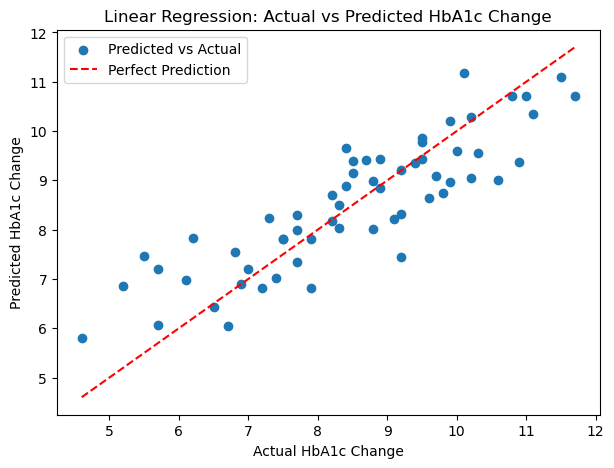

                            OLS Regression Results                            
Dep. Variable:          FollowupHbA1c   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     76.99
Date:                Mon, 08 Dec 2025   Prob (F-statistic):           5.06e-79
Time:                        00:49:37   Log-Likelihood:                -383.81
No. Observations:                 300   AIC:                             791.6
Df Residuals:                     288   BIC:                             836.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.4406    

In [34]:
#Linear Regression: predicting Follow-up HbA1c
X = df[['TreatmentGroup','StudySite','Age','Gender','BMI','DiabetesDuration',
        'SmokingStatus','EducationLevel','Complications','BaselineHbA1c','MedicationAdherence']]
y = df['FollowupHbA1c']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression RMSE: {rmse:.2f}")

# Visualizing linear regression
plt.figure(figsize = (7,5))
plt.scatter(y_test, y_pred, label = 'Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle = '--', 
         color = 'red', label = 'Perfect Prediction')
plt.xlabel('Actual HbA1c Change')
plt.ylabel('Predicted HbA1c Change')
plt.title('Linear Regression: Actual vs Predicted HbA1c Change')
plt.legend()
plt.show()

#regression summary
import statsmodels.api as sm
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

Logistic Regression Accuracy: 0.63


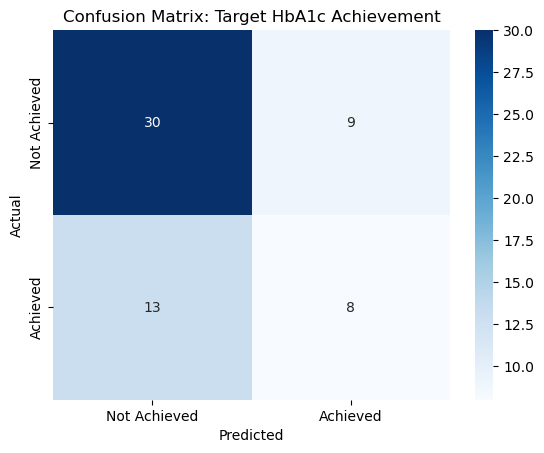

Optimization terminated successfully.
         Current function value: 0.610286
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         TargetAchieved   No. Observations:                  300
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                           11
Date:                Mon, 08 Dec 2025   Pseudo R-squ.:                 0.08098
Time:                        00:48:33   Log-Likelihood:                -183.09
converged:                       True   LL-Null:                       -199.22
Covariance Type:            nonrobust   LLR p-value:                 0.0006910
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2741      1.844      0.149      0.882      -3.341       3.889
Tr

In [33]:
#Logistic Regression: Predicting Target HbA1c Achievement
X = df[['TreatmentGroup', 'Age', 'Gender', 'BMI', 'DiabetesDuration',
        'SmokingStatus', 'Complications', 'BaselineHbA1c', 'BaselineFBS',
        'MedicationAdherence', 'StudySite']]
y = df['TargetAchieved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.2f}')

#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels = ['Not Achieved', 'Achieved'],
            yticklabels = ['Not Achieved', 'Achieved'], annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Target HbA1c Achievement')
plt.show() 

#Logisitc Regression Summary
X_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_const).fit()
print(logit_model.summary())

Logistic Regression Accuracy: 0.63


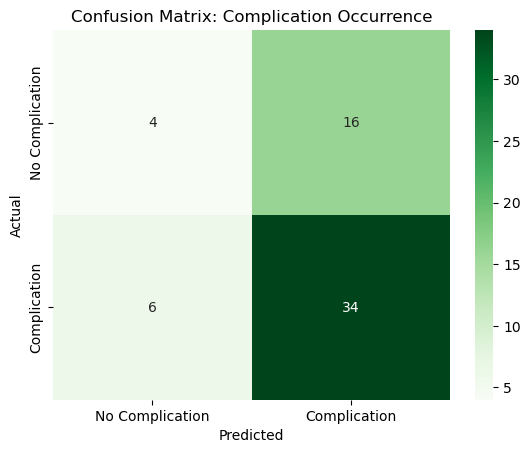

Optimization terminated successfully.
         Current function value: 0.631751
         Iterations 5
                            Logit Regression Results                            
Dep. Variable:     ComplicationOccurred   No. Observations:                  300
Model:                            Logit   Df Residuals:                      288
Method:                             MLE   Df Model:                           11
Date:                  Mon, 08 Dec 2025   Pseudo R-squ.:                 0.03866
Time:                          00:48:03   Log-Likelihood:                -189.53
converged:                         True   LL-Null:                       -197.15
Covariance Type:              nonrobust   LLR p-value:                    0.1716
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.4718      1.863      1.327      0.185      -1.17

In [32]:
#Logistic Regression: predicting Complication Occurrence
X = df[['TreatmentGroup', 'Age', 'Gender', 'BMI', 'DiabetesDuration', 'SmokingStatus', 
        'BaselineHbA1c', 'BaselineFBS', 'Complications', 'MedicationAdherence', 'HbA1cChange']]
y = df['ComplicationOccurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.2f}')

#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels = ['No Complication', 'Complication'],
            yticklabels = ['No Complication', 'Complication'], annot = True, cmap = 'Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Complication Occurrence')
plt.show()

#Logistic Regression Summary
X_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_const).fit()
print(logit_model.summary())    